In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
train_df = pd.read_csv('C:/Users/82106/OneDrive/문서/GitHub/3rd_project/3rd_project/train.csv')
train_df.head()

C:\Users\82106\AppData\Local\Temp\ipykernel_36116\2367595122.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('C:/Users/82106/OneDrive/문서/GitHub/3rd_project/3rd_project/train.csv')


,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147
2,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386
3,Organic Search,20160902,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213
4,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600


In [3]:
train_df_2 = train_df.copy()
train_df_2.date = pd.to_datetime(train_df_2['date'],format='%Y%m%d')

In [4]:
dau = train_df_2.groupby(['date'])['fullVisitorId'].nunique()

# Calculate WAU
wau = train_df_2.groupby([pd.Grouper(key='date', freq='W-MON')])['fullVisitorId'].nunique()

# Calculate MAU
mau = train_df_2.groupby([pd.Grouper(key='date', freq='M')])['fullVisitorId'].nunique()


In [5]:
mau

date
2016-08-31     63869
2016-09-30     61340
2016-10-31     86919
2016-11-30    102037
2016-12-31     66454
2017-01-31     54908
2017-02-28     53245
2017-03-31     58685
2017-04-30     56806
2017-05-31     54262
2017-06-30     54286
2017-07-31     59667
2017-08-31      2293
Freq: M, Name: fullVisitorId, dtype: int64

In [6]:
AU_df = pd.concat([dau, wau, mau], axis=1)
AU_df.columns = ['DAU', 'WAU', 'MAU']
AU_df

,DAU,WAU,MAU
date,,,
2016-08-01,1569.0,1569.0,NaN
2016-08-02,1961.0,NaN,NaN
2016-08-03,2657.0,NaN,NaN
2016-08-04,2947.0,NaN,NaN
2016-08-05,2492.0,NaN,NaN
...,...,...,...
2017-07-30,1649.0,NaN,NaN
2017-07-31,2368.0,13812.0,59667.0
2017-08-01,2293.0,NaN,NaN


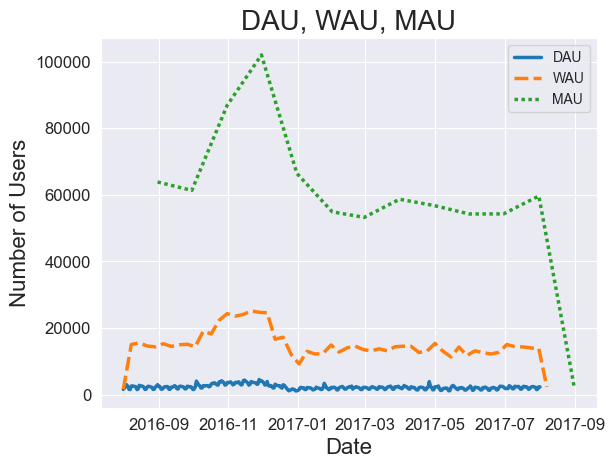

In [7]:
# Plot the data
sns.set_style("darkgrid")
sns.lineplot(data=AU_df, palette="tab10", linewidth=2.5)
plt.title("DAU, WAU, MAU", fontsize=20)
plt.xlabel("Date", fontsize=16)
plt.ylabel("Number of Users", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()